In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import sys

if './src' not in sys.path:
    sys.path.append('./src')

if './' not in sys.path:
    sys.path.append('./')

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
from os.path import join
from src.data import Data
def read_data(data):
    data_dir = join('./data', data + '_no_psl')
    file_train = join(data_dir, 'train.tsv')  # training data
    file_val = join(data_dir, 'val.tsv')  # validation datan
    file_test = join(data_dir, 'test.tsv')  # validation datan
    file_psl = join(data_dir, 'softlogic.tsv')  # probabilistic soft logic
    this_data = Data()
    this_data.load_data(file_train=file_train, file_val=file_val, file_test=file_test, file_psl= file_psl )
    return this_data
# print

In [2]:
ppi5k = read_data("ppi5k")
cn15k = read_data("cn15k")
nl27k = read_data("nl27k")

/storage/ssd3/wchao/PASSLEAF/code_passleaf_trimmed/src/data.py:149: RuntimeWarning: divide by zero encountered in power
  d_inv_sqrt = np.power(rowsum, -1).flatten()


In [88]:
# N = len(ppi5k.cons)  # pool of t: all concept vectors
# candidate = np.arange(0, N)
# # print(ppi5k.triples[0:50])

# data = np.array(ppi5k.triples).astype(int)
# ans = data[np.where((data[:,0]==40) & (data[:,1]==0))][:,2]
# print(ans)
# a = np.arange(0, N) 
# a[ans] = -100
# print(ppi5k.support[0][1][ppi5k.triples[:,1].astype(int)].shape)
# print()
# ppi5k.triples = np.column_stack((ppi5k.triples, ppi5k.support[0][0][ppi5k.triples[:,0].astype(int)]))
print(ppi5k.triples[ppi5k.triples[:,0].argsort()])

[[0.00000000e+00 0.00000000e+00 1.00000000e+00 3.29000000e-01
  1.71821306e-03 1.71821306e-03]
 [0.00000000e+00 3.00000000e+00 1.04000000e+02 9.12000000e-01
  1.71821306e-03 1.71821306e-03]
 [0.00000000e+00 0.00000000e+00 6.83000000e+02 3.29000000e-01
  1.71821306e-03 1.71821306e-03]
 ...
 [0.00000000e+00 1.00000000e+00 3.45000000e+02 3.29000000e-01
  1.71821306e-03 1.71821306e-03]
 [0.00000000e+00 1.00000000e+00 2.20000000e+02 4.51000000e-01
  1.71821306e-03 1.71821306e-03]
 [0.00000000e+00 1.00000000e+00 6.83000000e+02 3.29000000e-01
  1.71821306e-03 1.71821306e-03]]


In [23]:
# given h,r return available t,w
def make_list(h,r,source):
    data = None
    if source == 0 :
        data = this_data.triples
    elif source==1:
        data = this_data.val_triples
    elif source==2:
        data = this_data.test_triples
    fil_h = np.asarray([h])
    x = data[np.in1d(data[:, 0], fil_h)]
    fil_r = np.asarray([r])
    x = x[np.in1d(x[:, 1], fil_r)]
    note = np.repeat(source, x.shape[0])
    x = np.concatenate((x,note[:, None]),axis=1)
    return x

In [5]:
import numpy as np
# print(this_data.triples)
# print(this_data.hpt)
# print()
# train = this_data.triples
# val = this_data.val_triples
# test = this_data.test_triples
# records = set()
# ans = []

# for i in this_data.triples:
#     if (i[0],i[1]) not in records:
#         records.add((i[0],i[1]))
#         hrt = None
#         for source in range(3):
# #             print(dataset)
# #         get acceptable t,w given h,r
#             a = make_list(i[0],i[1],source)
# #             print(a)
#             if hrt is None:
#                 hrt = a
#             else:
#                 hrt= np.concatenate([hrt, a],axis=0)
# #             print(hrt)
#         ans.append(hrt)
  

In [10]:
# data = this_data.triples
# fil_h = np.asarray([5])
# x = data[np.in1d(data[:, 0], fil_h)]
# fil_r = np.asarray([2])
# x = x[np.in1d(x[:, 1], fil_r)]
# print(x)
print(np.sum(ans[0],axis=0))

[    0.             0.         11227.             5.62259054
     1.        ]


In [6]:

np.set_printoptions(suppress=True)
np.set_printoptions(formatter={'int': lambda x: "{0:0.5f}".format(x)})
np.set_printoptions(threshold=sys.maxsize)
print(ans[0])
# print(

[[   0.            0.            1.            0.89270879    0.        ]
 [   0.            0.           28.            0.5258777     0.        ]
 [   0.            0.         1216.            0.89270879    0.        ]
 [   0.            0.         1232.            0.5258777     0.        ]
 [   0.            0.         7979.            0.89270879    0.        ]
 [   0.            0.          526.            0.89270879    0.        ]
 [   0.            0.          245.            1.            1.        ]]


<Figure size 432x288 with 0 Axes>

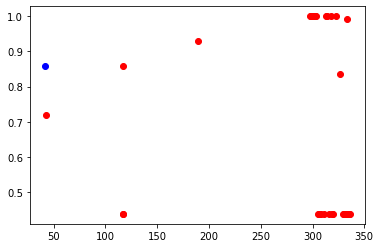

In [274]:
import matplotlib.pyplot as plt


cdict = {0: 'red', 1: 'blue', 2: 'green'}
plt.figure(figsize=(6,4))
fig, ax = plt.subplots()
for a in ans[150:170]:
    for g in np.unique(a[:,4].astype(int)):
        ix = np.where(a[:,4] == g)
#         print(a[ix,2])
        ax.scatter(a[ix,2], a[ix,3], c = cdict[g], label = g)
plt.savefig("dataset_distribution_2.png")
plt.show()

In [268]:
a = ans[0:20]
np.set_printoptions(precision=3)
print(a)
# print(a[np.where(ans[:,0]==5)])

[array([[0.   , 0.   , 1.   , 0.859, 0.   ],
       [0.   , 0.   , 2.   , 0.437, 0.   ]]), array([[3.   , 1.   , 4.   , 1.   , 0.   ],
       [3.   , 1.   , 5.   , 0.437, 0.   ],
       [3.   , 1.   , 6.   , 0.719, 0.   ]]), array([[7.   , 2.   , 8.   , 0.437, 0.   ]]), array([[ 9.,  3., 10.,  1.,  0.],
       [ 9.,  3., 11.,  1.,  0.],
       [ 9.,  3., 12.,  1.,  0.]]), array([[ 9.,  4., 13.,  1.,  0.]]), array([[14.   ,  5.   , 15.   ,  0.998,  0.   ]]), array([[14.   ,  6.   , 16.   ,  0.437,  0.   ],
       [14.   ,  6.   , 15.   ,  1.   ,  0.   ]]), array([[17.   ,  7.   , 18.   ,  0.859,  0.   ]]), array([[19.,  3., 20.,  1.,  0.]]), array([[19.,  8., 21.,  1.,  0.]]), array([[19.,  9., 22.,  1.,  0.],
       [19.,  9., 21.,  1.,  2.]]), array([[23., 10., 24.,  1.,  0.]]), array([[25.   ,  6.   , 26.   ,  0.437,  0.   ]]), array([[25.   , 11.   , 27.   ,  0.965,  0.   ]]), array([[25., 12., 28.,  1.,  0.]]), array([[29.  , 13.  , 30.  ,  0.55,  0.  ],
       [29.  , 13.  , 31.  

In [266]:
def mean_hitAtK(ans, type_of_dataset, ks, weighted = None, verbose=False, accurate_mode=False):
        """
        :param hr_map: {h:{r:{t:w}}}
        :param weighted: use linearly weighted metrics
        :param accurate_mode: set this flag to disable "Fast Ranking"
        :return:
        """
        # hitAt10_sum = 0  # nDCG with linear gain
        # count = 0
        hitAtK = np.zeros((len(ks),))
        count = np.zeros((len(ks),))

        if weighted == None:
            weighted = [False for _ in range(len(ks))]
        else:
            assert len(weighted) == len(ks)


        all_rank = []
        debug_count = 0
        for a in ans:
            a = a[np.argsort(a[:,3], axis=0)]
            ranks = np.where(a[:,4]==type_of_dataset)
#             print(ranks)
            weight=a[ranks][:,3]
            for k_idx, k in enumerate(ks):
                    if weighted[k_idx]:
                        hitAtK[k_idx] += sum((ranks[0] <= k)*weight)
                        count[k_idx] += sum(weight)
                    else:
                        hitAtK[k_idx] += sum(ranks[0] <= k)
                        count[k_idx] += ranks[0].shape[0]
        # print('count: ',count)
        return hitAtK / count, all_rank
class IndexScore:
        """
        The score of a tail when h and r is given.
        It's used in the ranking task to facilitate comparison and sorting.
        Print w as 3 digit precision float.
        """

        def __init__(self, index, score):
            self.index = index
            self.score = score

        def __lt__(self, other):
            return self.score < other.score

        def __repr__(self):
            # return "(index: %d, w:%.3f)" % (self.index, self.score)
            return "(%d, %.3f)" % (self.index, self.score)

        def __str__(self):
            return "(index: %d, w:%.3f)" % (self.index, self.score)

def mean_ndcg(self, ans, type_of_dataset, verbose, accurate_mode=False):
        """
        Compute nDCG(normalized discounted cummulative gain)
        sum(score_ground_truth / log2(rank+1)) / max_possible_dcg
        :param tw_truth: [IndexScore1, IndexScore2, ...], soreted by IndexScore.score descending
        :param accurate_mode: set this flag to disable "Fast Ranking"
        :return:
        """
        # prediction
        for a in ans:
            a = a[np.argsort(a[:,3], axis=0)]
            ranks = np.where(a[:,4]==type_of_dataset)
#             print(ranks)
            weight=a[ranks][:,3]
            for k_idx, k in enumerate(ks):
                    if weighted[k_idx]:
                        hitAtK[k_idx] += sum((ranks[0] <= k)*weight)
                        count[k_idx] += sum(weight)
                    else:
                        hitAtK[k_idx] += sum(ranks[0] <= k)
                        count[k_idx] += ranks[0].shape[0]
        # linear gain
        gains = np.array([tw.score for tw in tw_truth])
        # print('gains')
        # print(gains)
        discounts = np.log2(ranks + 1)
        discounted_gains = gains / discounts

        dcg = np.sum(discounted_gains)  # discounted cumulative gain
        # normalize
        max_possible_dcg = np.sum(gains / np.log2(np.arange(len(gains)) + 2))  # when ranks = [1, 2, ...len(truth)]
        ndcg = dcg / max_possible_dcg  # normalized discounted cumulative gain

        # exponential gain
        exp_gains = np.array([2 ** tw.score - 1 for tw in tw_truth])
        # print('exp_gains')
        # print(exp_gains)
        exp_discounted_gains = exp_gains / discounts
        # print('discounts')
        # print(discounts)
        exp_dcg = np.sum(exp_discounted_gains)
        # print('exp_dcg')
        # print(exp_dcg)
        # normalize
        exp_max_possible_dcg = np.sum(
            exp_gains / np.log2(np.arange(len(exp_gains)) + 2))  # when ranks = [1, 2, ...len(truth)]
        # print('exp_max_possible_dcg')
        # print(exp_max_possible_dcg)
        exp_ndcg = exp_dcg / exp_max_possible_dcg  # normalized discounted cumulative gain

        return ndcg, exp_ndcg

In [267]:
ideal_mean_hit,_ = mean_hitAtK(ans, 1, [10,20,40,10,20,40], weighted=[False,False,False,True,True,True], accurate_mode=False,verbose = False)
print(ideal_mean_hit)

[0.551 0.648 0.744 0.52  0.622 0.718]


In [3]:
import matplotlib.pyplot as plt

def plt_hist(data,name):
    n, bins, patches=plt.hist(data[:,3],bins=100)
    plt.xlabel("w value")
    plt.ylabel("Frequency")
    plt.title(name + " set")
    plt.savefig(name + ".png")
    plt.show()
def cal_mean(data):
    summ = 0
    count =0
#     print(data)
    summ = np.sum(data, axis=0)[3]
    count = data.shape[0]
    print(summ/count)

ppi
0.4150533887039539
0.4147313982226304
0.41241477900551604
nl
0.7946528317864997
0.8101972374964843
0.8059193827795796
cn
0.6290652085214853
0.6299481999103813
0.6272531330330928


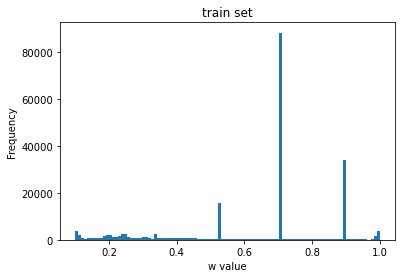

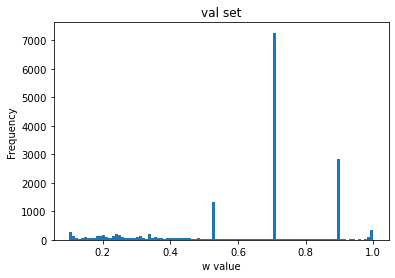

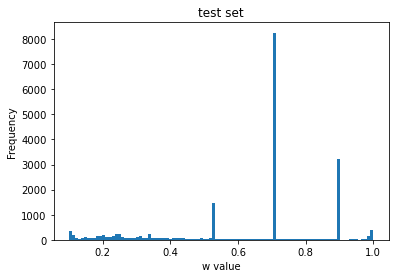

In [9]:
c = 0
d = ["ppi","nl","cn"]
for i in [ppi5k,nl27k,cn15k]:
    print(d[c])
    c+=1
    cal_mean(i.triples)
    cal_mean(i.val_triples)
    cal_mean(i.test_triples)
plt_hist(cn15k.triples, "train")
plt_hist(cn15k.val_triples, "val")
plt_hist(cn15k.test_triples,"test")


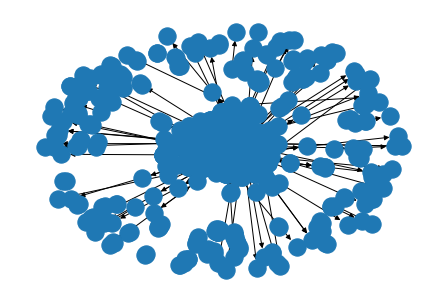

In [55]:
import networkx as nx

G = nx.DiGraph()
for i in ppi5k.triples:
    G.add_edge(i[0], i[2], weights=i[3], rel = i[1])
nx.draw(G)
plt.savefig("nl27k.png")
plt.show()

In [4]:
import tensorflow as tf
import numpy as np
from keras import backend as K 
K.clear_session()

Using TensorFlow backend.


In [36]:
import pandas as pd
import numpy as np
df = pd.DataFrame()
arr = np.empty((0,3), float)
a = np.array([[1, 2, 3]])
# print(df)
arr = np.vstack([arr,[1,2,3]])
arr = np.vstack([arr,[4,5,6]])
print(arr[:,0])
avg_bigger = np.sum(arr[:,0]/arr[:,2],axis=0)
print(avg_bigger)

[1. 4.]
1.0


In [37]:
i={}
i[1] = 1
print(i)

{1: 1}
